In [1]:
# Importing the libraries that we will be using for building the neural network
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# importing the classes for building the neural network layers
from tensorflow.keras.layers import Dense,Input,Concatenate

In [4]:
initialiezer=tf.keras.initializers.RandomUniform(minval=0.0005, maxval=1, seed=100)

input1= Input(shape=1)
input2= Input(shape=1)

l1=Dense(units=5,use_bias=True,activation='relu',kernel_initializer=initialiezer)(input1)
l1=Dense(units=5,use_bias=True,activation='relu',kernel_initializer=initialiezer)(l1)

l2=Dense(units=5,use_bias=True,activation='relu',kernel_initializer=initialiezer)(input2)
l2=Dense(units=5,use_bias=True,activation='relu',kernel_initializer=initialiezer)(l2)

concatted = Concatenate()([l1, l2])
out=Dense(units=2,use_bias=True,activation='relu',kernel_initializer=initialiezer)(concatted)


In [5]:
from tensorflow.keras.models import Model

In [6]:
model=Model([input1,input2],[out])

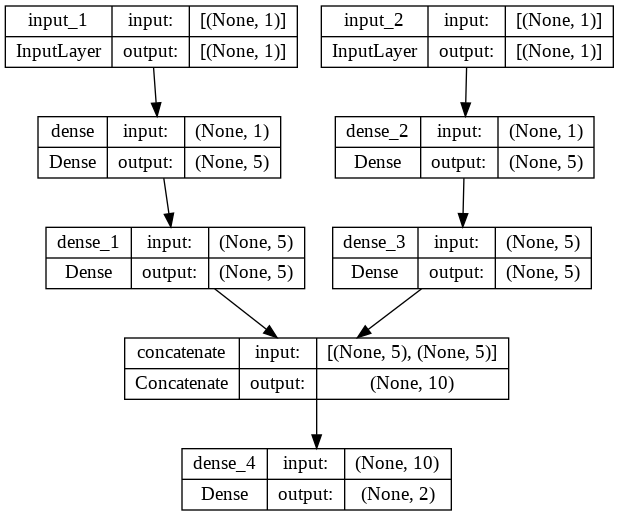

In [7]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [8]:
path='/content/drive/MyDrive/CSE 4-2/CSE-442/Codes/DataDeepLearning.csv'


In [9]:
import pandas
inputDataFrame=pandas.read_csv(path)
inputDataFrame

,x1,x2,y1=4*x1+5*x2+5,y2=10*x1+10*x2,y3=3*x1+10*x2
0,80,58,615,1380,820
1,19,87,516,1060,927
2,81,4,349,850,283
3,25,34,275,590,415
4,8,63,352,710,654
...,...,...,...,...,...
994,49,8,241,570,227
995,23,90,547,1130,969
996,85,23,460,1080,485
997,42,18,263,600,306


In [10]:
# Getting the data out as numpy arrays
x1s=inputDataFrame['x1'].to_numpy()
x2s=inputDataFrame['x2'].to_numpy()
y1s=inputDataFrame['y1=4*x1+5*x2+5'].to_numpy()
y2s=inputDataFrame['y2=10*x1+10*x2'].to_numpy()
y3s=inputDataFrame['y3=3*x1+10*x2'].to_numpy()

In [11]:
x1s=x1s.reshape(x1s.shape[0],1)
x2s=x2s.reshape(x2s.shape[0],1)

In [12]:
y1s=y1s.reshape(y1s.shape[0],1)
y2s=y2s.reshape(y2s.shape[0],1)
ys=np.concatenate((y1s,y2s),axis=1)

In [13]:
ys

array([[ 615, 1380],
       [ 516, 1060],
       [ 349,  850],
       ...,
       [ 460, 1080],
       [ 263,  600],
       [ 641, 1460]])

In [14]:
import sklearn
from sklearn.model_selection import train_test_split
x1Train, x1Test, x2Train, x2Test, yTrain, yTest = train_test_split(x1s,x2s,ys, test_size=0.20, random_state=42)

In [15]:
print(f'the shape of x1Train = {x1Train.shape}')
print(f'the shape of x1Test = {x1Test.shape}')

print(f'the shape of x2Train = {x2Train.shape}')
print(f'the shape of x2Test = {x2Test.shape}')

print(f'the shape of yTrain = {yTrain.shape}')
print(f'the shape of yTest = {yTest.shape}')

the shape of x1Train = (799, 1)
the shape of x1Test = (200, 1)
the shape of x2Train = (799, 1)
the shape of x2Test = (200, 1)
the shape of yTrain = (799, 2)
the shape of yTest = (200, 2)


In [16]:
# configure the training
model.compile(loss='mse',metrics=['mse'],optimizer=tf.optimizers.Adam(learning_rate=0.01))

In [17]:
# train the model. just run a few epochs for this test run. you can adjust later.
history=model.fit(x=[x1Train,x2Train],y=[yTrain],validation_data=([x1Test,x2Test],[yTest]),batch_size=256, epochs=300)

Epoch 1/300
4/4 [==============================] - 1s 104ms/step - loss: 301292.3750 - mse: 301292.3750 - val_loss: 248675.9844 - val_mse: 248675.9844
Epoch 2/300
4/4 [==============================] - 0s 19ms/step - loss: 236155.5938 - mse: 236155.5938 - val_loss: 187697.0000 - val_mse: 187697.0000
Epoch 3/300
4/4 [==============================] - 0s 15ms/step - loss: 174980.7031 - mse: 174980.7031 - val_loss: 130356.6406 - val_mse: 130356.6406
Epoch 4/300
4/4 [==============================] - 0s 14ms/step - loss: 117696.0078 - mse: 117696.0078 - val_loss: 79479.7344 - val_mse: 79479.7344
Epoch 5/300
4/4 [==============================] - 0s 14ms/step - loss: 69139.5859 - mse: 69139.5859 - val_loss: 39412.1602 - val_mse: 39412.1602
Epoch 6/300
4/4 [==============================] - 0s 17ms/step - loss: 31712.3574 - mse: 31712.3574 - val_loss: 13899.9277 - val_mse: 13899.9277
Epoch 7/300
4/4 [==============================] - 0s 16ms/step - loss: 9933.7979 - mse: 9933.7979 - val_loss

In [18]:
input=[x1Test[60],x2Test[60]]
output=model.predict(input)

1/1 [==============================] - 0s 114ms/step


In [19]:
input

[array([68]), array([84])]

In [20]:
yTest[60]

array([ 697, 1520])

In [21]:
output

array([[ 698.04095, 1518.9911 ]], dtype=float32)